In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define Function and Gradient Descent

In [2]:
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def objective_function(P, A, B, C):
    return distance(P, A) + distance(P, B) + distance(P, C)

def gradient(P, A, B, C):
    dPx = ((P[0] - A[0]) / distance(P, A)) + ((P[0] - B[0]) / distance(P, B)) + ((P[0] - C[0]) / distance(P, C)) # gradient of f(x1, x2) based on x1
    dPy = ((P[1] - A[1]) / distance(P, A)) + ((P[1] - B[1]) / distance(P, B)) + ((P[1] - C[1]) / distance(P, C)) # gradient of f(x1, x2) based on x2
    return np.array([dPx, dPy])

def find_optimal_P(A, B, C, learning_rate = 0.01, tolerance = 1e-6, max_iterations = 10000):
    P = np.array([(A[0] + B[0] + C[0]) / 3, (A[1] + B[1] + C[1]) / 3])

    for i in range(max_iterations):
        grad = gradient(P, A, B, C)
        new_P = P - learning_rate * grad

        if np.linalg.norm(new_P - P) < tolerance:
            break

        P = new_P

    return P

Điểm P tối ưu: [0.21136309 0.21136309]


### Create three point and Visualization

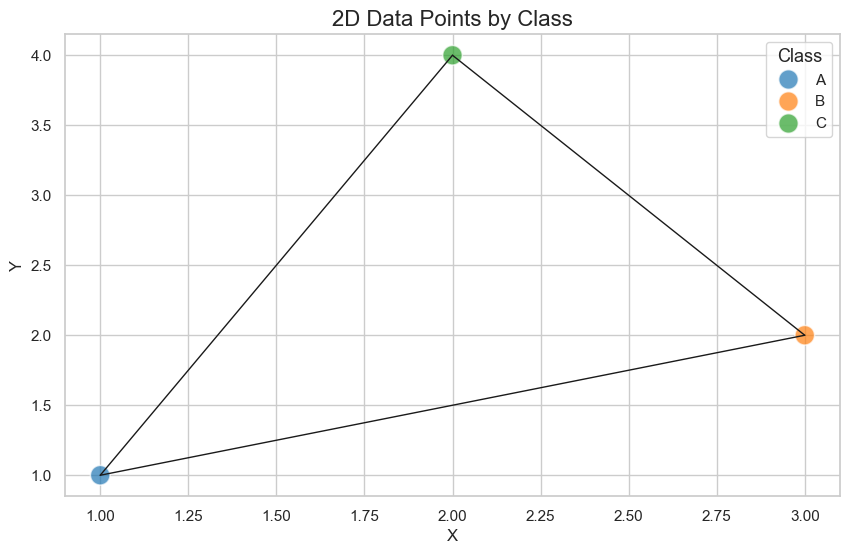

In [20]:
df = pd.DataFrame({
    'x': [1,3,2],
    'y': [1,2,4],
    'class': ["A", "B","C"]
})
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=200, alpha=0.7)

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        plt.plot([df['x'][i], df['x'][j]], [df['y'][i], df['y'][j]], 'k-', lw=1)  # Vẽ đường nối giữa các điểm

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

In [22]:
x= df.to_numpy()[:,0]
y= df.to_numpy()[:,1]

A = [x[0],y[0]]
B = [x[1],y[1]]
C = [x[2],y[2]]

optimal_P = find_optimal_P(A, B, C, max_iterations = 20000)
print(f"Điểm P tối ưu: {optimal_P}")
df = pd.DataFrame({
    'x': [1,4,2],
    'y': [1,2,4],
    'class': ["A", "B","C"]
})
optimal_p_df = pd.DataFrame({
    'x':    optimal_P[0],
    'y':    optimal_P[1],
    'class': ["optimal P"]
})

Điểm P tối ưu: [2.42257335 2.42257335]


### Result Visualization

In [ ]:
combined_df = pd.concat([df,optimal_p_df ], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=50, alpha=0.7, markers="o", edgecolor=None)

sns.scatterplot(data=combined_df[combined_df['class'] == 'centroid cluster'], x='x', y='y', color='black', s=300, 
                        marker='x', label='Centroid', edgecolor='black')

plt.title('2D Data Points for Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Class')


plt.savefig('kmean-cluster.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()